In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import re
import missingno as mso
from scipy import stats
from scipy.stats import ttest_ind
from scipy.stats import pearsonr
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import pandas as pd

In [2]:
data=pd.read_csv("weatherHistory.csv")
data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [3]:
data.shape

(96453, 12)

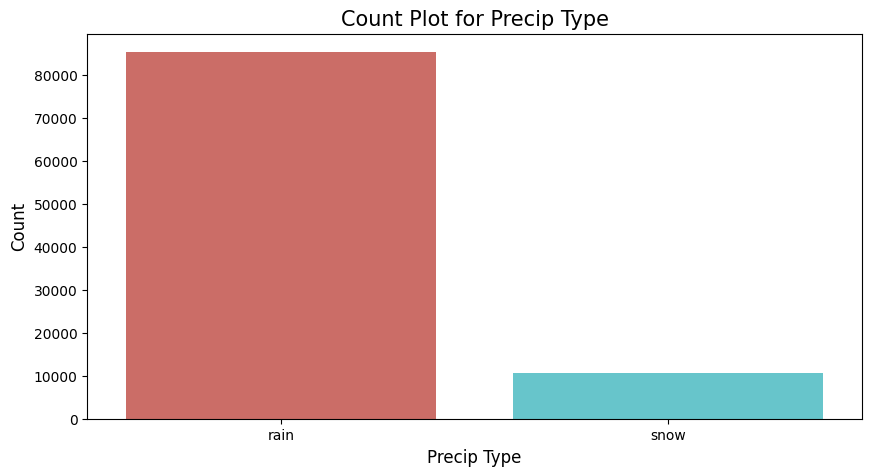

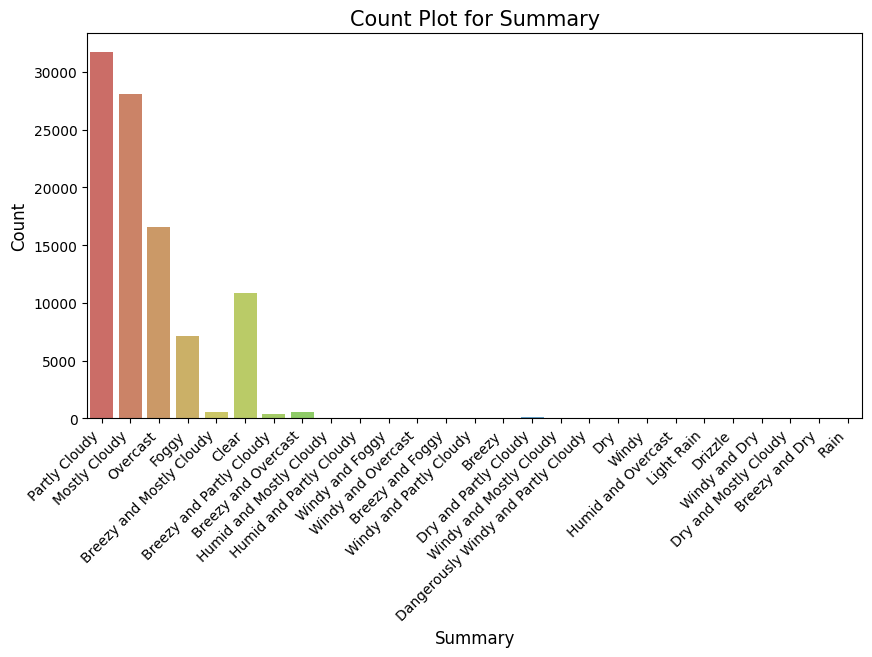

In [4]:
import warnings
warnings.filterwarnings('ignore')
# sns.countplot(x="Precip Type", data=data, palette='hls')
# sns.countplot(x="Summary", data=data, palette='hls')
# Vẽ biểu đồ đếm cho "Precip Type"
plt.figure(figsize=(10, 5))
sns.countplot(x="Precip Type", data=data, palette='hls')
plt.title('Count Plot for Precip Type', fontsize=15)
plt.xlabel('Precip Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()


# Vẽ biểu đồ đếm cho "Summary"
plt.figure(figsize=(10, 5))
sns.countplot(x="Summary", data=data, palette='hls')
plt.title('Count Plot for Summary', fontsize=15)
plt.xlabel('Summary', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.show()


In [5]:
# countrain=len(data[data.weather=='rain'])
# countsun=len(data[data.weather=='sun'])
# countdrizzle=len(data[data.weather=='drizzle'])
# countsnow=len(data[data.weather=='snow'])
# countfog=len(data[data.weather=='fog'])
# print('percent of rain:{:2f}%'.format((countrain/(len(data.weather))*100)))
# print('percent of sun:{:2f}%'.format((countsun/(len(data.weather))*100)))
# print('percent of drizzle:{:2f}%'.format((countdrizzle/(len(data.weather))*100)))
# print('percent of snow:{:2f}%'.format((countsnow/(len(data.weather))*100)))
# print('percent of fog:{:2f}%'.format((countfog/(len(data.weather))*100)))

In [6]:
data[['Temperature (C)','Apparent Temperature (C)','Humidity','Wind Speed (km/h)']].describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h)
count,96453.000000,96453.000000,96453.000000,96453.000000
mean,11.932678,10.855029,0.734899,10.810640
std,9.551546,10.696847,0.195473,6.913571
min,-21.822222,-27.716667,0.000000,0.000000
25%,4.688889,2.311111,0.600000,5.828200
50%,12.000000,12.000000,0.780000,9.965900
75%,18.838889,18.838889,0.890000,14.135800
max,39.905556,39.344444,1.000000,63.852600


ValueError: Could not interpret value `precipitation` for `x`. An entry with this name does not appear in `data`.

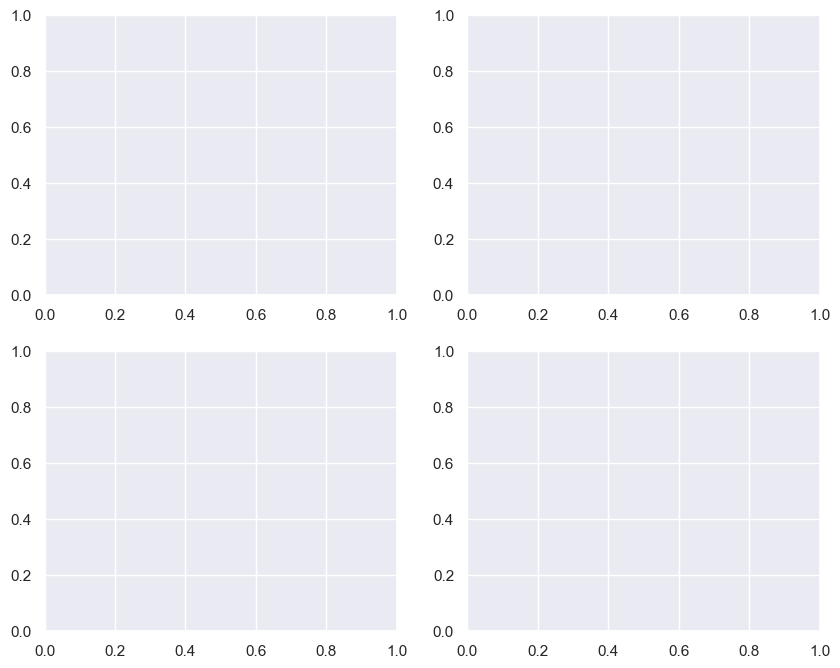

In [7]:
sns.set(style='darkgrid')
fig,axs=plt.subplots(2,2,figsize=(10,8))
sns.histplot(data=data,x='precipitation',kde=True,ax=axs[0,0],color='green')
sns.histplot(data=data,x='temp_max',kde=True,ax=axs[0,1],color='red')
sns.histplot(data=data,x='temp_min',kde=True,ax=axs[1,0],color='blue')
sns.histplot(data=data,x='wind',kde=True,ax=axs[1,1],color='orange')

<Axes: xlabel='wind', ylabel='Count'>

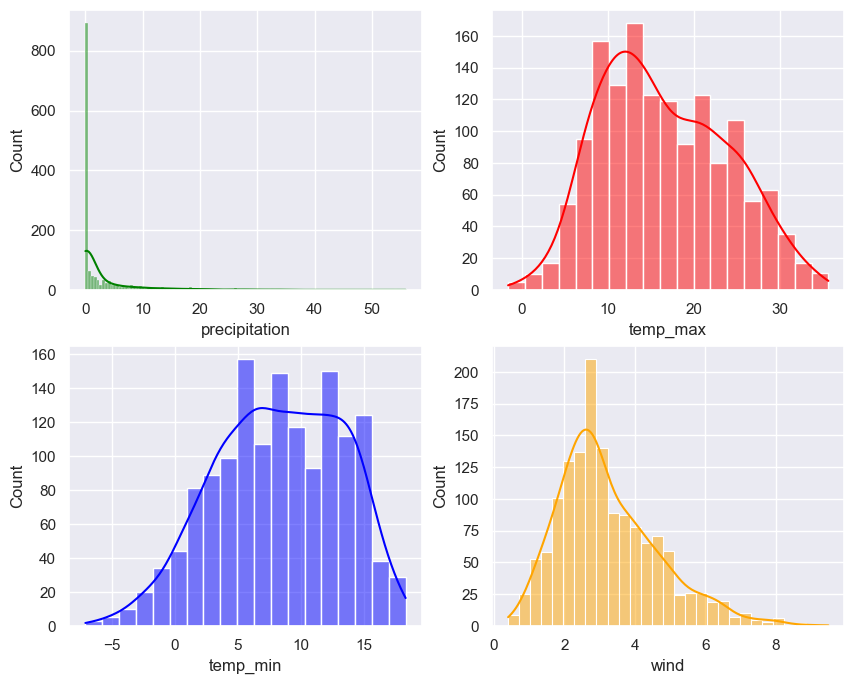

In [ ]:
sns.set(style='darkgrid')
fig,axs=plt.subplots(2,2,figsize=(10,8))
# Tạo các biểu đồ histplot với kde=True
sns.histplot(data=data, x='precipitation', kde=True, ax=axs[0, 0], color='green')
sns.histplot(data=data, x='temp_max', kde=True, ax=axs[0, 1], color='red')
sns.histplot(data=data, x='temp_min', kde=True, ax=axs[1, 0], color='blue')
sns.histplot(data=data, x='wind', kde=True, ax=axs[1, 1], color='orange')

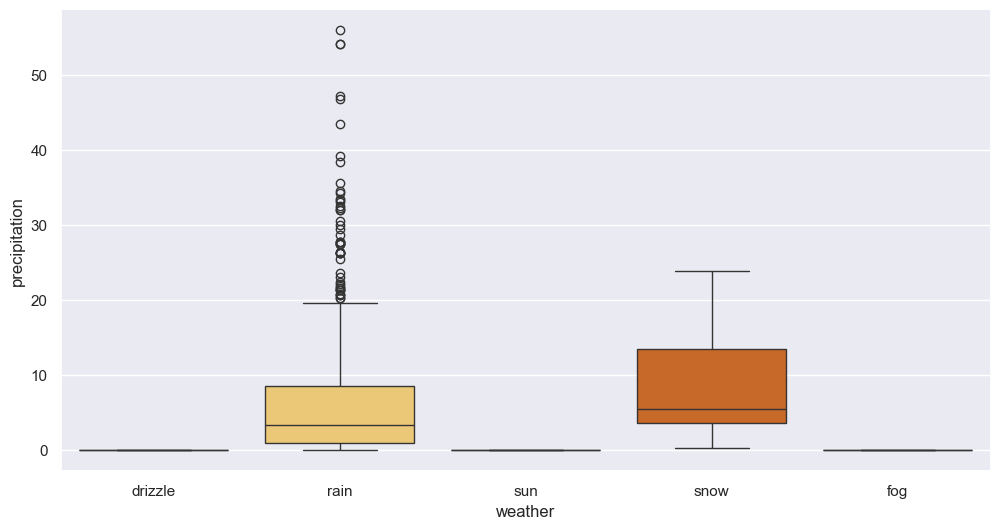

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='weather', y='precipitation', data=data, palette='YlOrBr')
plt.show()


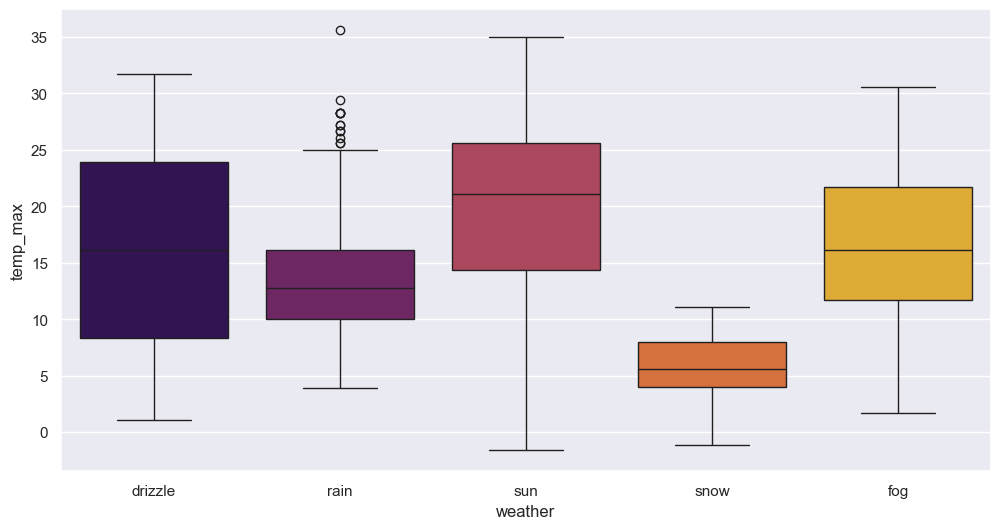

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='weather', y='temp_max', data=data, palette='inferno')
plt.show()


<Axes: xlabel='wind', ylabel='weather'>

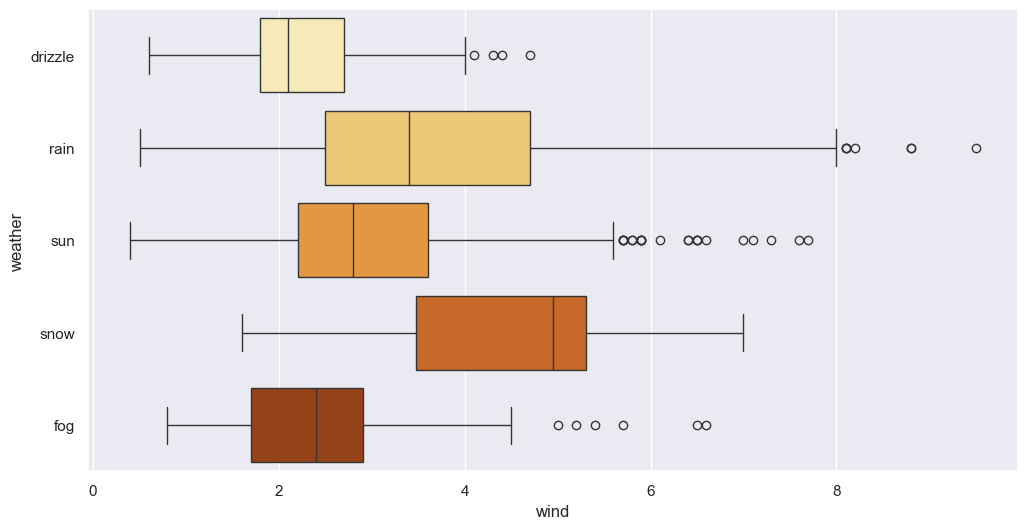

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='wind', y='weather', data=data, palette='YlOrBr')


<Axes: xlabel='temp_min', ylabel='weather'>

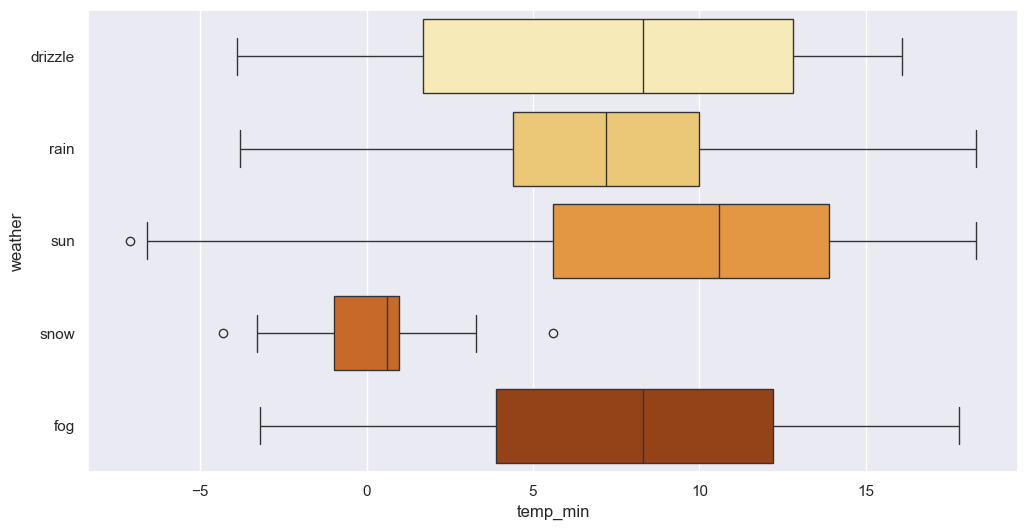

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='temp_min', y='weather', data=data, palette='YlOrBr')


<Axes: >

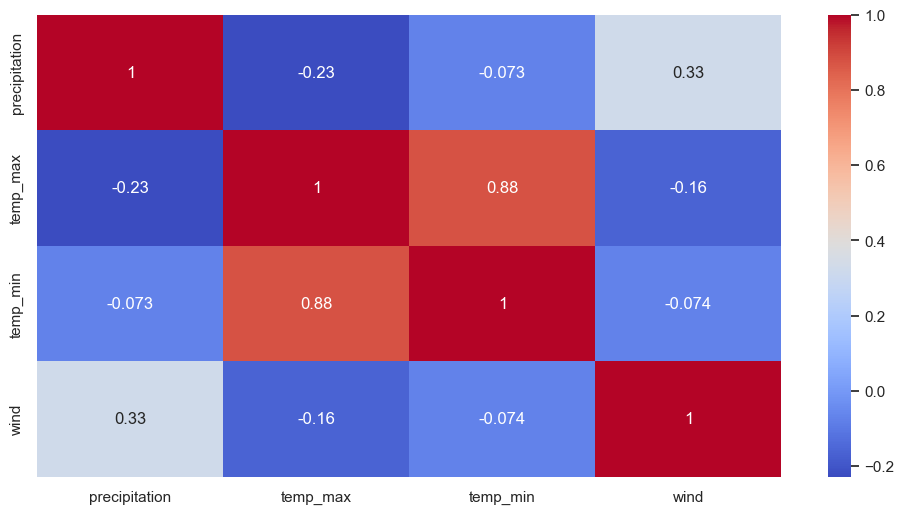

In [ ]:


# Loại bỏ cột 'date' nếu có
data_numeric = data.select_dtypes(include=['number'])

# Tính toán ma trận tương quan và vẽ heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(data_numeric.corr(), annot=True, cmap='coolwarm')


pearsons correlation:  -0.22855481643297043
T test and P value:  TtestResult(statistic=-51.60685279531918, pvalue=0.0, df=2920.0)


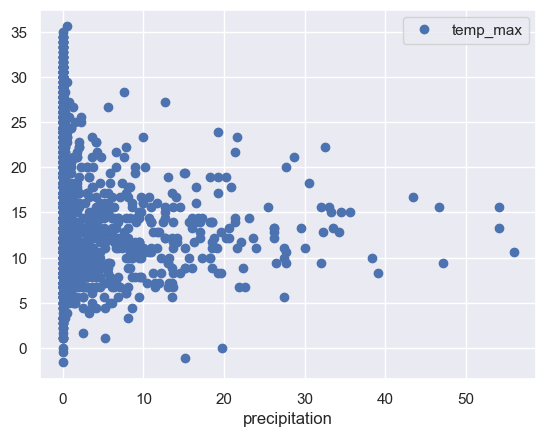

In [ ]:
data.plot("precipitation",'temp_max',style='o')
print('pearsons correlation: ',data['precipitation'].corr(data['temp_max']))
print('T test and P value: ',stats.ttest_ind(data['precipitation'],data['temp_max']))

pearsons correlation:  -0.16485663487495483
T test and P value:  TtestResult(statistic=-67.3601643301846, pvalue=0.0, df=2920.0)


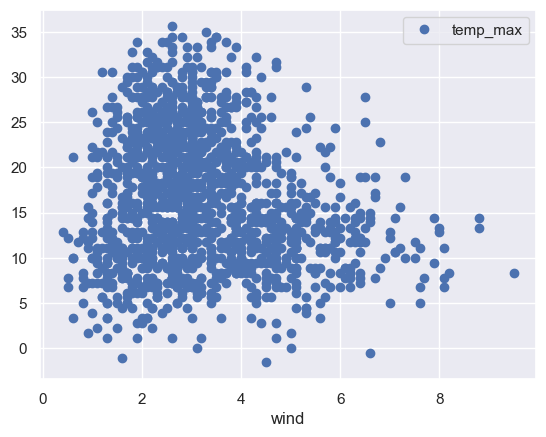

In [ ]:
data.plot("wind",'temp_max',style='o')
print('pearsons correlation: ',data['wind'].corr(data['temp_max']))
print('T test and P value: ',stats.ttest_ind(data['wind'],data['temp_max']))

<Axes: xlabel='temp_max'>

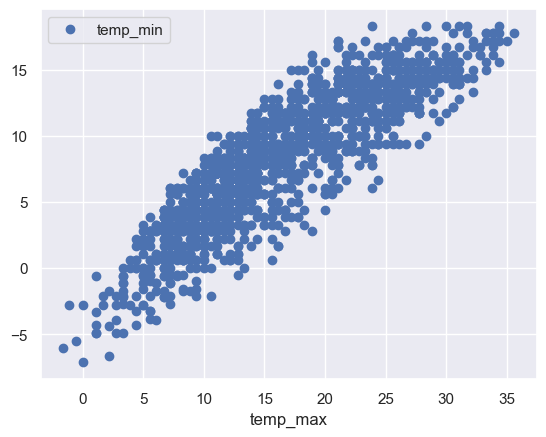

In [ ]:
data.plot('temp_max','temp_min',style='o')

In [ ]:
data.isna().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

<Axes: >

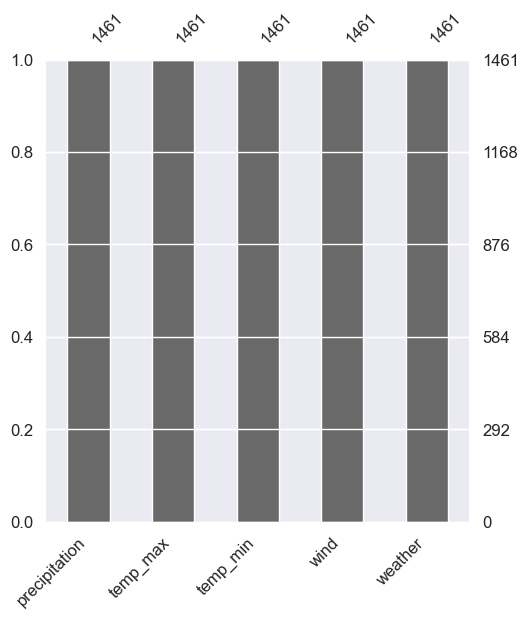

In [ ]:
plt.figure(figsize=(12,6))
axz=plt.subplot(1,2,2)
mso.bar(data.drop(['date'],axis=1),ax=axz,fontsize=12)

In [ ]:
data=data.drop(['date'],axis=1)

In [ ]:
# Chọn các cột dạng số
numeric_columns = data.select_dtypes(include=['number'])

# Tính toán phân vị
Q1 = numeric_columns.quantile(0.25)
Q3 = numeric_columns.quantile(0.75)
IQR = Q3 - Q1

# Loại bỏ các dòng nằm ngoài khoảng ngoại lệ
data = data[~((numeric_columns < (Q1 - 1.5 * IQR)) | (numeric_columns > (Q3 + 1.5 * IQR))).any(axis=1)]


In [ ]:
import numpy as np
data.precipitation=np.sqrt(data.precipitation)
data.wind=np.sqrt(data.wind)

<Axes: xlabel='wind', ylabel='Count'>

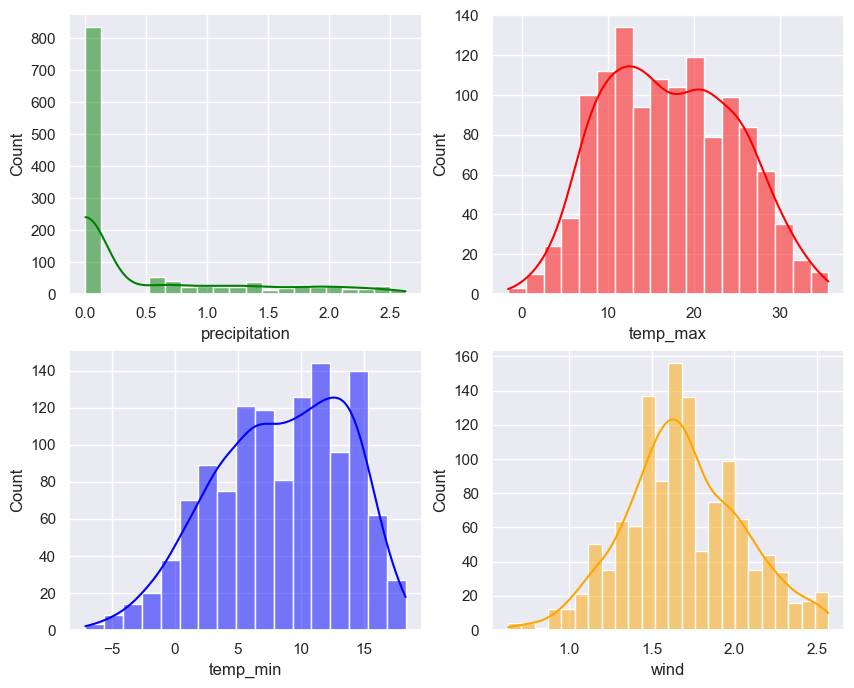

In [ ]:
sns.set(style='darkgrid')
fig, axs=plt.subplots(2,2,figsize=(10,8))
sns.histplot(data=data,x="precipitation",kde=True,ax=axs[0,0],color='green')
sns.histplot(data=data,x="temp_max",kde=True,ax=axs[0,1],color='red')
sns.histplot(data=data,x="temp_min",kde=True,ax=axs[1,0],color='blue')
sns.histplot(data=data,x="wind",kde=True,ax=axs[1,1],color='orange')

In [ ]:
data.head()

,precipitation,temp_max,temp_min,wind,weather
0,0.000000,12.8,5.0,2.167948,drizzle
2,0.894427,11.7,7.2,1.516575,rain
4,1.140175,8.9,2.8,2.469818,rain
5,1.581139,4.4,2.2,1.483240,rain
6,0.000000,7.2,2.8,1.516575,rain


In [ ]:
lc=LabelEncoder()
data['weather']=lc.fit_transform(data['weather'])

In [ ]:
data.head()

,precipitation,temp_max,temp_min,wind,weather
0,0.000000,12.8,5.0,2.167948,0
2,0.894427,11.7,7.2,1.516575,2
4,1.140175,8.9,2.8,2.469818,2
5,1.581139,4.4,2.2,1.483240,2
6,0.000000,7.2,2.8,1.516575,2


In [ ]:
x=((data.loc[:,data.columns!='weather']).astype(int)).values[:,0:]
y=data['weather'].values

In [ ]:
data.weather.unique()

array([0, 2, 4, 3, 1])

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=2)

In [ ]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
print('KNN accuracy:{:.2f}%'.format(knn.score(x_test,y_test)*100))

KNN accuracy:78.23%


In [ ]:
svm=SVC()
svm.fit(x_train,y_train)
print('SVM accuracy:{:.2f}%'.format(svm.score(x_test,y_test)*100))

SVM accuracy:77.42%


In [ ]:
gbc=GradientBoostingClassifier(subsample=0.5,n_estimators=450,max_depth=5,max_leaf_nodes=25)
gbc.fit(x_train,y_train)
print('GBC accuracy:{:.2f}%'.format(gbc.score(x_test,y_test)*100))

GBC accuracy:83.87%


In [ ]:
import warnings
warnings.filterwarnings('ignore')
xgb=XGBClassifier()
xgb.fit(x_train,y_train)
print('XGB accuracy:{:.2f}%'.format(xgb.score(x_test,y_test)*100))

XGB accuracy:82.26%


In [ ]:
input=[[1.140175,8.9,2.8,2.469818]]
ot=xgb.predict(input)
print('the weather is:')
if(ot==0):
  print('Drizzle')
elif (ot==1):
  print('fogg')
elif (ot==2):
  print('rain')
elif (ot==3):
  print('snow')
else:
  print('sun')

the weather is:
rain


In [ ]:
import pickle
file = 'model.pkl'
pickle.dump(xgb, open(file, 'wb'))